In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import IPython
from scipy.io import wavfile
from scipy.fft import fft, ifft

In [2]:
Nx = 101
Nt = 500000
L = 0.7
dx = L / (Nx - 1)
f = 220
c = 2 * L * f
dt = 5e-6
l = 5e-5
gamma = 5e-5

In [3]:
ya = np.linspace(0, 1, 70)
yb = np.linspace(1, 0, 31)
y0 = np.concatenate([ya, yb])

In [4]:
states = np.zeros((Nt, Nx))

In [5]:
states[0] = y0
states[1] = y0

In [6]:
def compute_states(d, times, length, dt, dx, l, gamma):
    for t in range(1, times - 1):
        for i in range(2, length - 2):
            outer_fact = (1 / (c ** 2 * dt ** 2) + gamma / (2 * dt)) ** (-1)
            p1 = 1 / dx ** 2 * (d[t][i-1] - 2 * d[t][i] + d[t][i+1])
            p2 = 1 / (c ** 2 * dt ** 2) * (d[t-1][i] - 2 * d[t][i])
            p3 = gamma / (2 * dt) * d[t-1][i]
            p4 = l ** 2 / dx ** 4 * (d[t][i+2] - 4 * d[t][i+1] + 6 * d[t][i] - 4 * d[t][i-1] + d[t][i-2])
            d[t+1][i] = outer_fact * (p1 - p2 + p3 - p4)
    return d

In [7]:
states = compute_states(states, Nt, Nx, dt, dx, l, gamma)

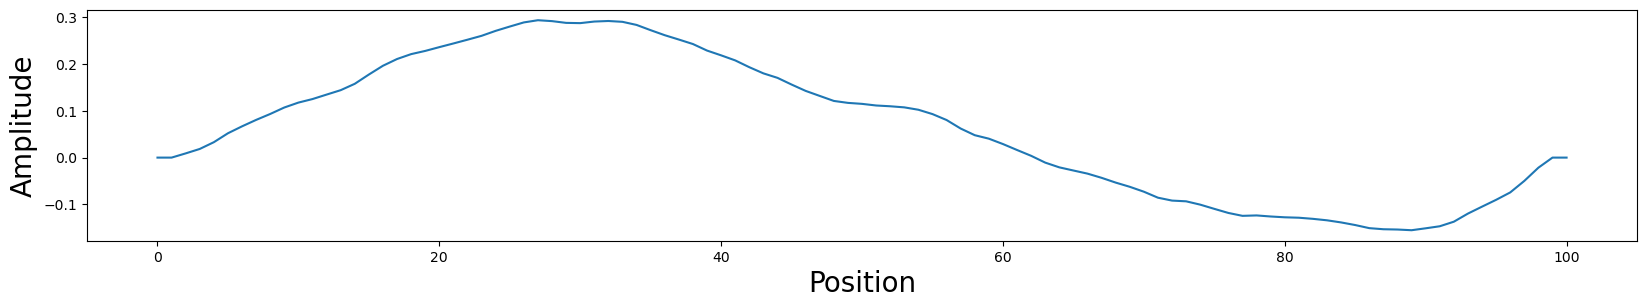

In [10]:
plt.figure(figsize=(20, 3))
plt.plot(states[10000])
plt.xlabel('Position', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.savefig('sample.png')

TypeError: 'Figure' object is not callable

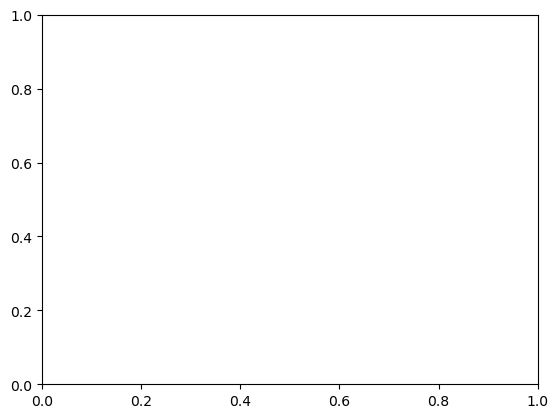

In [27]:
def animate(i):
    ax.clear()
    ax.plot(states[i * 10])
    ax.set_ylim(-1, 1)
    
fig, ax = plt.subplots(1,1)
ax.set_ylim(-1, 1)
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('string.gif',writer='pillow',fps=20)

In [30]:
def compute_xmX(states):
    xmX = []
    for state in states:
        mX = []
        for n in range(10):
            sin_arr = np.sin(n * np.pi * np.linspace(0, 1, 101))
            mX.append(sum(sin_arr * state))
        
        xmX.append(np.array(mX))
    return np.array(xmX)

In [31]:
xmX = compute_xmX(states)

In [ ]:
x = []
for mX in xmX:
    x.append(sum(mX) / Nx)

In [ ]:
plt.plot(x)
IPython.display.Audio(x, rate=fs)

In [18]:
fs, ir = wavfile.read("impulse_response.wav")
ir = ir / np.max(abs(ir))
len(ir)

3709

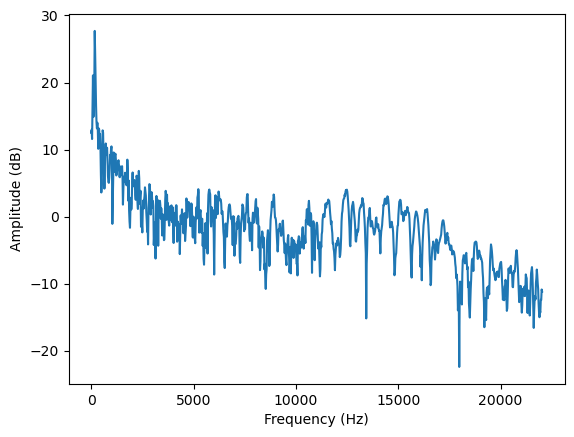

In [29]:
plt.plot(np.arange(1024) * fs / 2048, 10*np.log10(abs(fft(ir[:2048])[int(20 / fs * 2048):1024])))
plt.xlabel('Frequency (Hz)', fontsize=10)
plt.ylabel('Amplitude (dB)', fontsize=10)
plt.savefig('response.png')

In [ ]:
x = np.convolve(x, ir, mode='full')

In [ ]:
plt.plot(x)
IPython.display.Audio(x, rate=fs)